<a href="https://colab.research.google.com/github/Taekil/TensorFLowStudyNote/blob/master/pytorch_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://tutorials.pytorch.kr/beginner/basics/tensorqs_tutorial.html

tensors provide a unified wya to train neural networks for more complex data sets.

In [ ]:
import torch
import numpy as np

data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)
# tensor generated
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_ones = torch.ones_like(x_data) # keep shape and datatype
print(f"Ones Tensor: \n {x_ones} \n")
x_rand = torch.rand_like(x_data, dtype=torch.float) # override
print(f"Ones Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Ones Tensor: 
 tensor([[0.1046, 0.2824],
        [0.7030, 0.2658]]) 



In [ ]:
# random or constant
# shape is the tuple to express dimension
shape = (2, 3, )
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random: \n {rand_tensor}\n")
print(f"Ones: \n {ones_tensor}\n")
print(f"Zeros: \n {zeros_tensor}\n")

Random: 
 tensor([[0.6699, 0.4394, 0.6460],
        [0.8459, 0.9755, 0.7451]])

Ones: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]])

Zeros: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])



tensor's attribute: Shape and datatype, the saving location.

In [ ]:
tensor = torch.rand(3,4)
# attribute
print(f"shape of tensor: {tensor.shape}")
print(f"datatype of tensor: {tensor.dtype}")
print(f"device of tensor: {tensor.device}")

# operation-> transposing, indexing, slicing,mathmetical operation, etc.
# oeration in GPU
# Colab, Edit>Notebook settings
# tensor in CPU
# similar to Numpy

shape of tensor: torch.Size([3, 4])
datatype of tensor: torch.float32
device of tensor: cpu


In [ ]:
tensor = torch.ones(4, 4)
print(f"first row: {tensor[0]}")
print(f"first column{tensor[:,0]}")
print(f"last column{tensor[...,-1]}")
tensor[:,1] = 0
print(tensor)


first row: tensor([1., 1., 1., 1.])
first columntensor([1., 1., 1., 1.])
last columntensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


torch.cat
torch.stack

In [ ]:
t1 = torch.cat([tensor, tensor, tensor], dim = 1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


dataset and dataloader
code for process data samples can get messy and hard to maintain.

decoupled from our model training code for better

* readability
* modularity

torch.utils.dadta.DataLoader
torch.utils.data.Dataset

pre-loaded datasets
Dataset: the samples and their corresponding labels

root
train
download=true
transform and target_transform

In [4]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 17413114.57it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 303712.12it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5472452.24it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 24260985.38it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



Dataset -> list -> indexing
traning_data[index], matplotlib


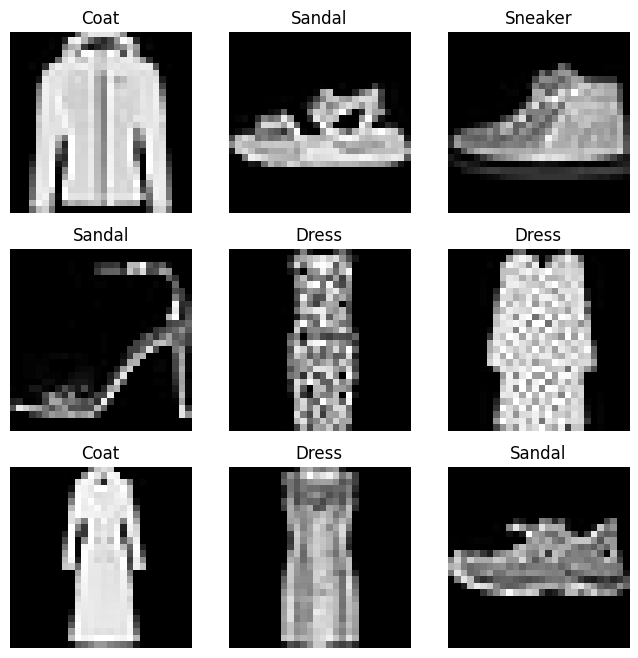

In [7]:
labels_map = {
    0:"T-Shirt",
    1:"Trouser",
    2:"Pullover",
    3:"Dress",
    4:"Coat",
    5:"Sandal",
    6:"Shirt",
    7:"Sneaker",
    8:"Bag",
    9:"Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols* rows + 1):
  sample_idx = torch.randint(len(training_data), size=(1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()
